## Wapi Daktari (ClinicQueue AI)

### Problem Statement

## 1. Data Preprocessing

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Load the dataset
df = pd.read_csv('../data/wapi_daktari_healthcare_dataset.csv')


In [61]:
# Display the first few rows of the dataset
df.head()

,hospital_name,date,day_of_week,is_weekend,is_holiday,is_strike_day,department,time_block,doctors_on_shift,expected_patients,...,national_events,average_waiting_time_last_week,average_patients_last_month,previous_day_waiting_time,previous_week_waiting_time,previous_month_waiting_time,doctors_on_shift_expected_patients,doctor_patient_ratio_congestion_level,flu_season,malaria_season
0,Mbagathi,2025-01-01,2,False,True,False,Pediatrics,Morning,0,86,...,0,106,78,110,113,103,0,0.0,1,0
1,Mbagathi,2025-01-01,2,False,True,False,Pediatrics,Afternoon,0,67,...,1,106,52,100,102,88,0,0.0,1,0
2,Mbagathi,2025-01-01,2,False,True,False,Pediatrics,Evening,0,68,...,1,114,59,119,115,104,0,0.0,1,0
3,Mbagathi,2025-01-01,2,False,True,False,Emergency,Morning,0,92,...,0,105,78,112,93,112,0,0.0,1,0
4,Mbagathi,2025-01-01,2,False,True,False,Emergency,Afternoon,0,70,...,1,110,66,102,98,100,0,0.0,1,0


In [63]:
df.describe()

,day_of_week,doctors_on_shift,expected_patients,actual_patients,waiting_time_minutes,doctor_arrival_delay,month,day,patient_load_ratio,doctor_patient_ratio,...,national_events,average_waiting_time_last_week,average_patients_last_month,previous_day_waiting_time,previous_week_waiting_time,previous_month_waiting_time,doctors_on_shift_expected_patients,doctor_patient_ratio_congestion_level,flu_season,malaria_season
count,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,...,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000
mean,2.997260,2.043836,64.140968,64.117516,58.507032,59.928183,6.526027,15.720548,0.999557,0.033302,...,0.499763,53.511123,54.034155,53.479416,48.546301,43.450776,133.519489,0.066604,0.246575,0.252055
std,1.997979,1.597417,15.405267,15.735332,26.642087,34.938651,3.447914,8.796408,0.053926,0.027046,...,0.500009,26.831209,16.920256,26.816332,27.338934,28.166409,115.920473,0.054093,0.431025,0.434200
min,0.000000,0.000000,35.000000,30.000000,30.000000,0.000000,1.000000,1.000000,0.857143,0.000000,...,0.000000,20.000000,11.000000,20.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,52.000000,52.000000,39.000000,30.000000,4.000000,8.000000,0.956522,0.012658,...,0.000000,35.000000,42.000000,35.000000,29.000000,24.000000,46.000000,0.025316,0.000000,0.000000
50%,3.000000,2.000000,65.000000,64.000000,49.000000,60.000000,7.000000,16.000000,1.000000,0.030769,...,0.000000,44.000000,53.000000,44.000000,40.000000,35.000000,112.000000,0.061538,0.000000,0.000000
75%,5.000000,3.000000,74.000000,74.000000,59.000000,90.000000,10.000000,23.000000,1.042553,0.052632,...,1.000000,56.000000,65.000000,56.000000,54.000000,53.000000,205.000000,0.105263,0.000000,1.000000
max,6.000000,5.000000,119.000000,120.000000,120.000000,120.000000,12.000000,31.000000,1.142857,0.166667,...,1.000000,120.000000,117.000000,120.000000,120.000000,120.000000,525.000000,0.333333,1.000000,1.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27375 entries, 0 to 27374
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   hospital_name                          27375 non-null  object 
 1   date                                   27375 non-null  object 
 2   day_of_week                            27375 non-null  int64  
 3   is_weekend                             27375 non-null  bool   
 4   is_holiday                             27375 non-null  bool   
 5   is_strike_day                          27375 non-null  bool   
 6   department                             27375 non-null  object 
 7   time_block                             27375 non-null  object 
 8   doctors_on_shift                       27375 non-null  int64  
 9   expected_patients                      27375 non-null  int64  
 10  actual_patients                        27375 non-null  int64  
 11  wa

In [66]:
df.duplicated().sum()

np.int64(0)

In [67]:
df.nunique()

hospital_name                                5
date                                       365
day_of_week                                  7
is_weekend                                   2
is_holiday                                   2
is_strike_day                                2
department                                   5
time_block                                   3
doctors_on_shift                             6
expected_patients                           84
actual_patients                             89
waiting_time_minutes                        62
peak_hour                                    2
doctor_available                             2
doctor_arrival_delay                       121
congestion_level                             1
month                                       12
day                                         31
patient_load_ratio                         588
doctor_patient_ratio                       310
holiday_strike_interaction                   1
expected_walk

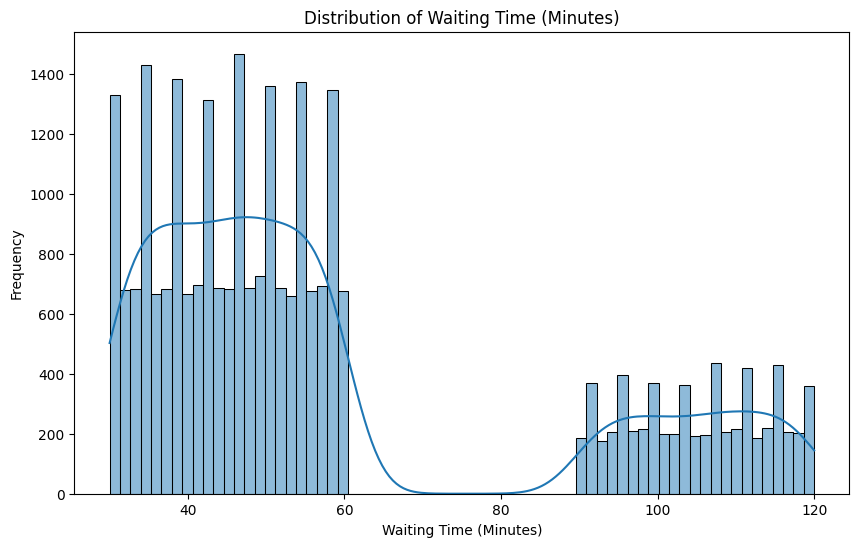

In [68]:
# Visualize the distribution of 'waiting_time_minutes'
plt.figure(figsize=(10, 6))
sns.histplot(df['waiting_time_minutes'], kde=True)
plt.title('Distribution of Waiting Time (Minutes)')
plt.xlabel('Waiting Time (Minutes)')
plt.ylabel('Frequency')
plt.show()

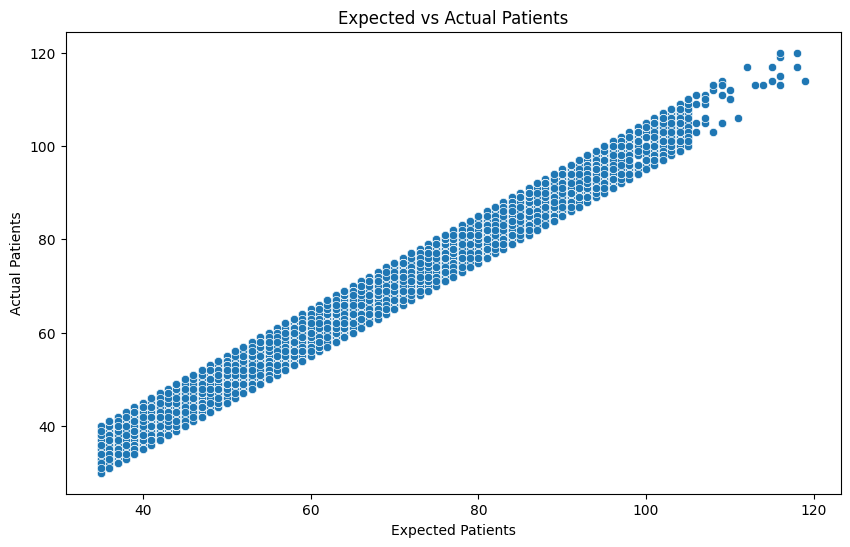

In [69]:
# Visualize the relationship between 'expected_patients' and 'actual_patients'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_patients', y='actual_patients', data=df)
plt.title('Expected vs Actual Patients')
plt.xlabel('Expected Patients')
plt.ylabel('Actual Patients')
plt.show()

In [70]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

/tmp/ipykernel_40267/3719194803.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='time_block', y='expected_walk_ins', hue='day_of_week', data=df, ci=None)


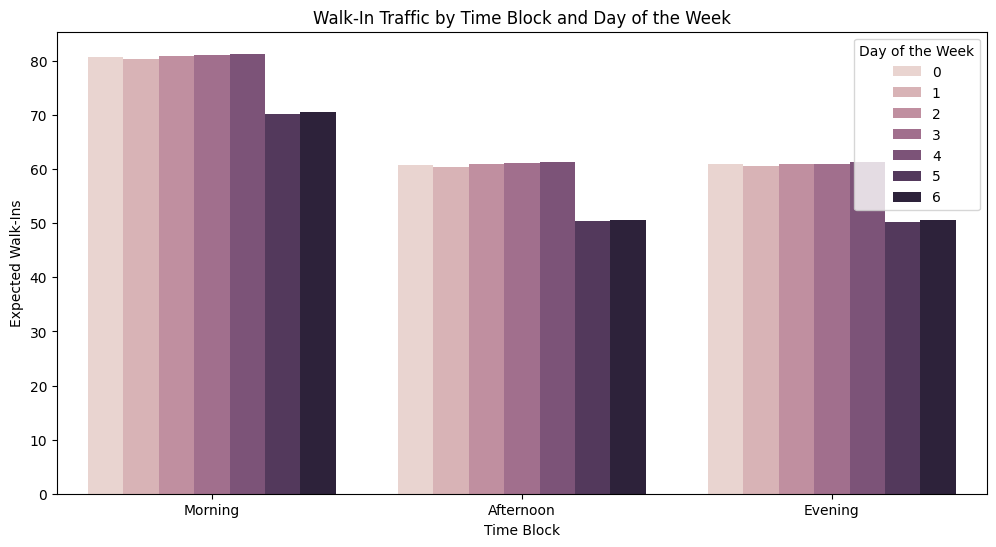

In [71]:
# Plot walk-in traffic by time block and day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='time_block', y='expected_walk_ins', hue='day_of_week', data=df, ci=None)
plt.title('Walk-In Traffic by Time Block and Day of the Week')
plt.xlabel('Time Block')
plt.ylabel('Expected Walk-Ins')
plt.legend(title='Day of the Week')
plt.show()

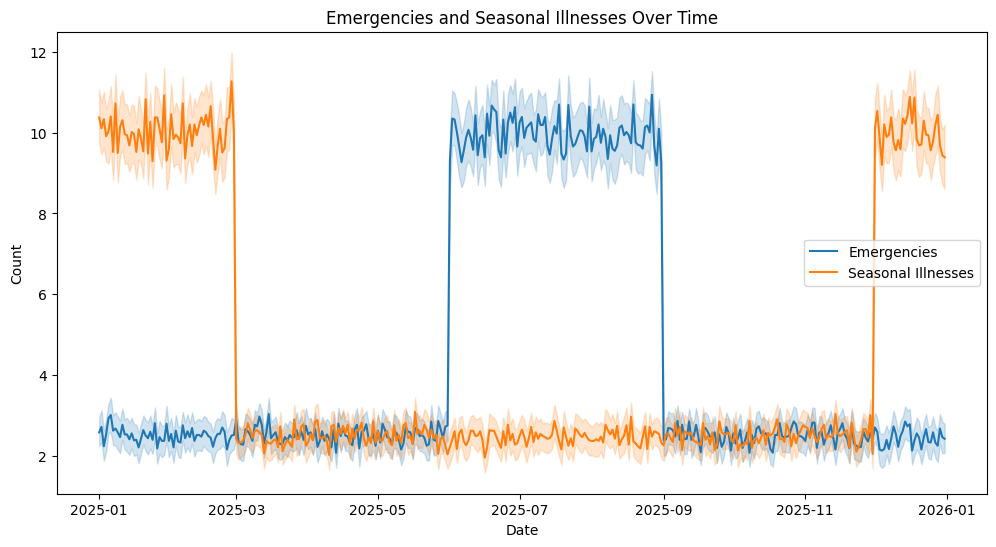

In [72]:
# Plot emergencies and seasonal illnesses over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='emergencies', data=df, label='Emergencies')
sns.lineplot(x='date', y='seasonal_illnesses', data=df, label='Seasonal Illnesses')
plt.title('Emergencies and Seasonal Illnesses Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

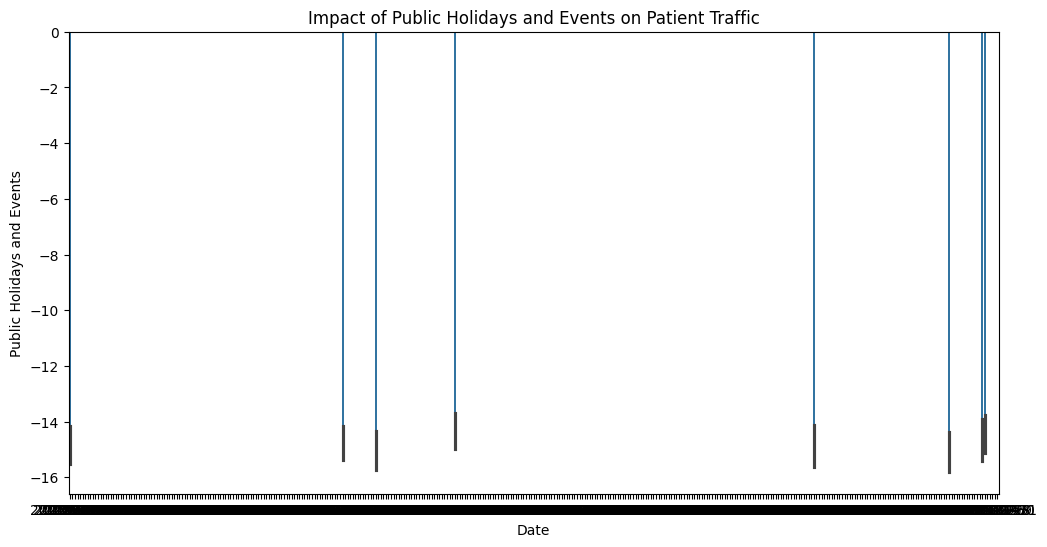

In [73]:
# Visualize the impact of public holidays and events on patient traffic
plt.figure(figsize=(12, 6))
sns.barplot(x='date', y='public_holidays_events', data=df)
plt.title('Impact of Public Holidays and Events on Patient Traffic')
plt.xlabel('Date')
plt.ylabel('Public Holidays and Events')
plt.show()

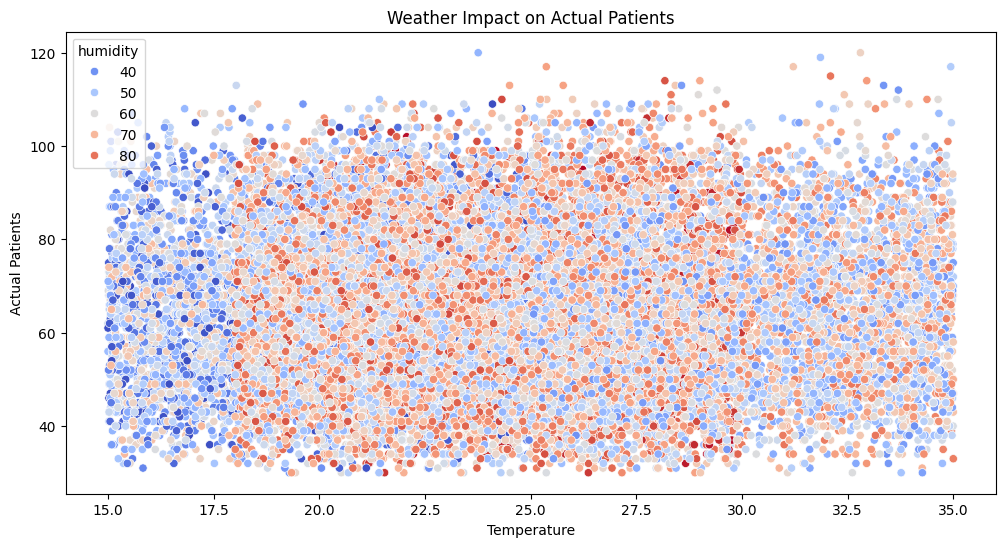

In [74]:
# Visualize the relationship between weather conditions and actual patients
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temperature', y='actual_patients', hue='humidity', data=df, palette='coolwarm')
plt.title('Weather Impact on Actual Patients')
plt.xlabel('Temperature')
plt.ylabel('Actual Patients')
plt.show()

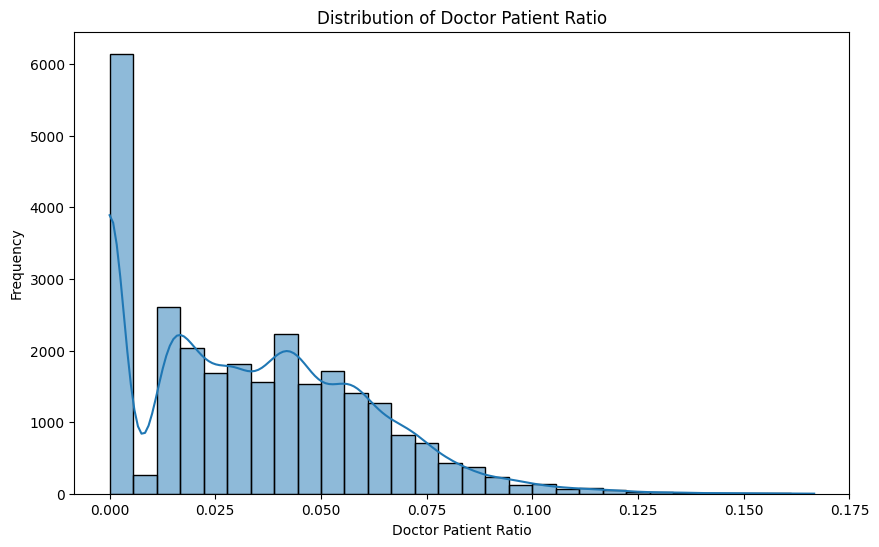

In [75]:
# Visualize the distribution of doctor patient ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['doctor_patient_ratio'], kde=True, bins=30)
plt.title('Distribution of Doctor Patient Ratio')
plt.xlabel('Doctor Patient Ratio')
plt.ylabel('Frequency')
plt.show()

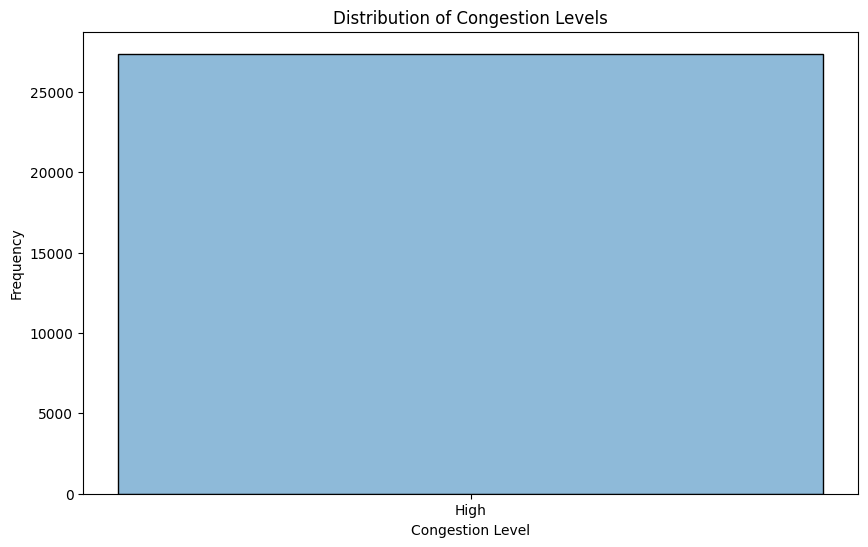

In [76]:
# Visualize the distribution of congestion levels
plt.figure(figsize=(10, 6))
sns.histplot(df['congestion_level'], kde=True, bins=30)
plt.title('Distribution of Congestion Levels')
plt.xlabel('Congestion Level')
plt.ylabel('Frequency')
plt.show()

In [77]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Mbagathi'

<Figure size 1200x800 with 0 Axes>

In [ ]:

# Train a RandomForest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf_reg = rf_regressor.predict(X_test_reg_scaled)
print(f'RandomForest Regressor MSE: {mean_squared_error(y_test_reg, y_pred_rf_reg)}')

# Train an XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(X_train_reg_scaled, y_train_reg)
y_pred_xgb_reg = xgb_regressor.predict(X_test_reg_scaled)
print(f'XGBoost Regressor MSE: {mean_squared_error(y_test_reg, y_pred_xgb_reg)}')

# Train a Hybrid Regressor (Voting Regressor)
hybrid_regressor = VotingRegressor(estimators=[('rf', rf_regressor), ('xgb', xgb_regressor)])
hybrid_regressor.fit(X_train_reg_scaled, y_train_reg)
y_pred_hybrid_reg = hybrid_regressor.predict(X_test_reg_scaled)
print(f'Hybrid Regressor MSE: {mean_squared_error(y_test_reg, y_pred_hybrid_reg)}')

# Train a RandomForest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_class_scaled, y_train_class)
y_pred_rf_class = rf_classifier.predict(X_test_class_scaled)
print(f'RandomForest Classifier Accuracy: {accuracy_score(y_test_class, y_pred_rf_class) * 100:.2f}%')

# Train an XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_class_scaled, y_train_class)
y_pred_xgb_class = xgb_classifier.predict(X_test_class_scaled)
print(f'XGBoost Classifier Accuracy: {accuracy_score(y_test_class, y_pred_xgb_class) * 100:.2f}%')

# Train a Hybrid Classifier (Voting Classifier)
hybrid_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('xgb', xgb_classifier)])
hybrid_classifier.fit(X_train_class_scaled, y_train_class)
y_pred_hybrid_class = hybrid_classifier.predict(X_test_class_scaled)
print(f'Hybrid Classifier Accuracy: {accuracy_score(y_test_class, y_pred_hybrid_class) * 100:.2f}%')

# Save the models and scaler
joblib.dump(rf_regressor, 'src/api/random_forest_regressor.pkl')
joblib.dump(xgb_regressor, 'src/api/xgboost_regressor.pkl')
joblib.dump(hybrid_regressor, 'src/api/hybrid_regressor.pkl')
joblib.dump(rf_classifier, 'src/api/random_forest_classifier.pkl')
joblib.dump(xgb_classifier, 'src/api/xgboost_classifier.pkl')
joblib.dump(hybrid_classifier, 'src/api/hybrid_classifier.pkl')
joblib.dump(preprocessor, 'src/api/preprocessor.pkl')